In [1]:
from quantile_regression_chain import quantileRegression_chain as qRC
from quantile_regression_chain import quantileRegression_chain_disc as qRCd
import numpy as np
import yaml

Welcome to JupyROOT 6.22/02


In [1]:
data_EB_input = 'df_data_EB_test.h5'
data_EE_input = 'df_data_EE_test.h5'
mc_EB_input = 'df_mc_EB_test.h5'
mc_EE_input = 'df_mc_EE_test.h5'

ss = ['probeCovarianceIeIp','probeS4','probeR9','probePhiWidth','probeSigmaIeIe','probeEtaWidth']
ch = ['probeChIso03','probeChIso03worst']
ph = ['probePhoIso']
year = '2017'
n_evts = 4700000
workDir = '/work/gallim/dataframes/2017'
weightsDirs = '/work/gallim/weights/2017'
#weightsDirs = '/work/gallim/weights/2018_mc_full_dask_bkp_one_missing'
#weightsDirs = '/work/gallim/tmp/tnp_fulldask/weights'

In [2]:
cols = ["mass","probeScEnergy","probeScEta","probePhi","run","weight",
        "weight_clf","rho","probeR9","probeSigmaIeIe","probePhiWidth",
        "probeEtaWidth","probeCovarianceIeIp","probeCovarianceIpIp",
        "probeS4","probePhoIso","probeChIso03","probeChIso03worst",
        "probeSigmaRR","probePt","tagPt","probePassEleVeto","tagScEta"]

# Plots

In [3]:
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

In [4]:
plt.style.use(mplhep.style.CMS)

In [5]:
output_name_EB = 'final_output_EB'
output_name_EE = 'final_output_EE'

df_EB = pd.read_hdf('{}/{}.h5'.format(workDir, output_name_EB))
#df_EE = pd.read_hdf('{}/{}.h5'.format(workDir, output_name_EE))

EB_evs = len(df_EB.index)
#EE_evs = len(df_EE.index)

'''
data_EB = pd.read_hdf('{}/{}'.format(workDir, dataframes['data']['EB']['input'])).iloc[:EB_evs]
data_EE = pd.read_hdf('{}/{}'.format(workDir, dataframes['data']['EE']['input'])).iloc[:EE_evs]

mc_EB = pd.read_hdf('{}/{}'.format(workDir, dataframes['mc']['EB']['input'])).iloc[:EB_evs]
mc_EE = pd.read_hdf('{}/{}'.format(workDir, dataframes['mc']['EE']['input'])).iloc[:EE_evs]
'''

data_EB = pd.read_hdf('{}/{}'.format(workDir, data_EB_input))
#data_EE = pd.read_hdf('{}/{}'.format(workDir, data_EE_input))

mc_EB = pd.read_hdf('{}/{}'.format(workDir, mc_EB_input))
#mc_EE = pd.read_hdf('{}/{}'.format(workDir, mc_EE_input))

In [6]:
def plot_contributes(data_df, trained_df, var, bins, rg, legend_location, legend_prop=None, logy=False):
    data_kwargs = dict(alpha=0.0, density=True, histtype='step', edgecolor='black')
    mc_uncorr_kwargs = dict(alpha=1.0, density=True, histtype='step', edgecolor='red')
    mc_corr_kwargs = dict(alpha=1.0, density=True, histtype='step', edgecolor='blue')
    
    dcounts, dedges, patch = plt.hist(data_df[var], bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    dcentres = (dedges[:-1] + dedges[1:])/2.
    plt.plot(dcentres, dcounts, 'k.')
    plt.hist(trained_df[var], bins=bins, range=rg, label='{}_MC'.format(var), **mc_uncorr_kwargs)
    plt.hist(trained_df['{}_corr'.format(var)], bins=bins, range=rg, label='{}_MC_corr'.format(var), **mc_corr_kwargs)
    plt.legend(loc=legend_location, prop=legend_prop)
    if logy:
        plt.yscale('log')
    plt.show()
    
def plot_both_contributes(data_dfs, trained_dfs, var, bins, rg, legend_location, legend_prop=None, logy=False):
    data_kwargs = dict(alpha=0.0, density=True, histtype='step', edgecolor='black')
    mc_uncorr_kwargs = dict(alpha=1.0, density=True, histtype='step', edgecolor='red')
    mc_corr_kwargs = dict(alpha=1.0, density=True, histtype='step', edgecolor='blue')
    
    dcounts, dedges, patch = plt.hist(pd.concat([data_dfs[0][var], data_dfs[1][var]], ignore_index=True), 
         bins=bins, range=rg, label='{}_data'.format(var), **data_kwargs)
    dcentres = (dedges[:-1] + dedges[1:])/2.
    plt.plot(dcentres, dcounts, 'k.')
    plt.hist(pd.concat([trained_dfs[0][var], trained_dfs[1][var]], ignore_index=True), 
         bins=bins, range=rg, label='{}_MC'.format(var), **mc_uncorr_kwargs)
    plt.hist(pd.concat([trained_dfs[0]['{}_corr'.format(var)], trained_dfs[1]['{}_corr'.format(var)]], ignore_index=True), 
         bins=bins, range=rg, label='{}_MC_corr'.format(var), **mc_corr_kwargs)
    plt.legend(loc=legend_location, prop=legend_prop)
    if logy:
        plt.yscale('log')
    plt.show()

# CovarianceIeIp

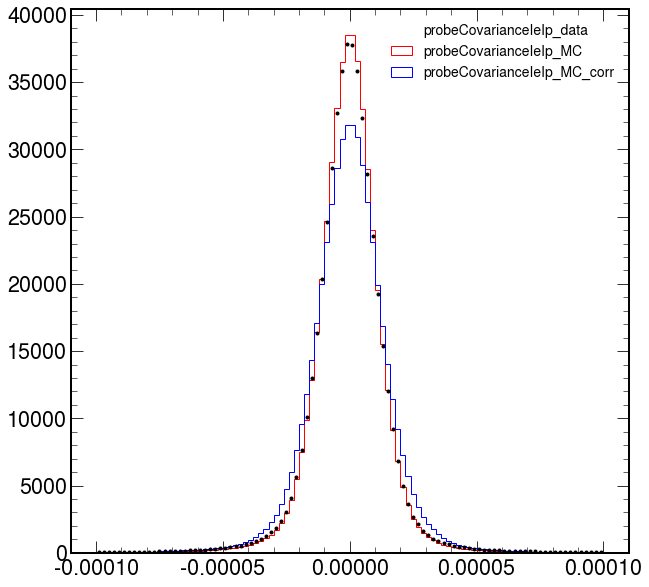

In [7]:
rg = [-0.0001, 0.0001]
bins = 100

plot_contributes(data_EB, df_EB, 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14})

In [ ]:
rg = [-0.001, 0.001]
bins = 100

plot_contributes(data_EE, df_EE, 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14})

In [ ]:
#rg = [-0.0004, 0.0003]
rg = [-0.0001, 0.0001]
bins = 100

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeCovarianceIeIp', bins, rg, 'upper right', {'size': 14})

# S4

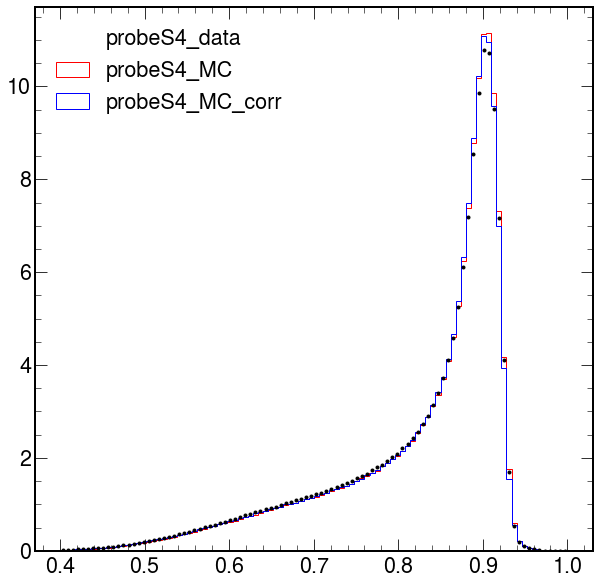

In [8]:
rg = [0.4, 1]
bins = 100

plot_contributes(data_EB, df_EB, 'probeS4', bins, rg, 'upper left')

In [ ]:
rg = [0.4, 1]
bins = 100

plot_contributes(data_EE, df_EE, 'probeS4', bins, rg, 'upper left')

In [ ]:
rg = [0.4, 1]
bins = 100

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeS4', bins, rg, 'upper left')

# R9

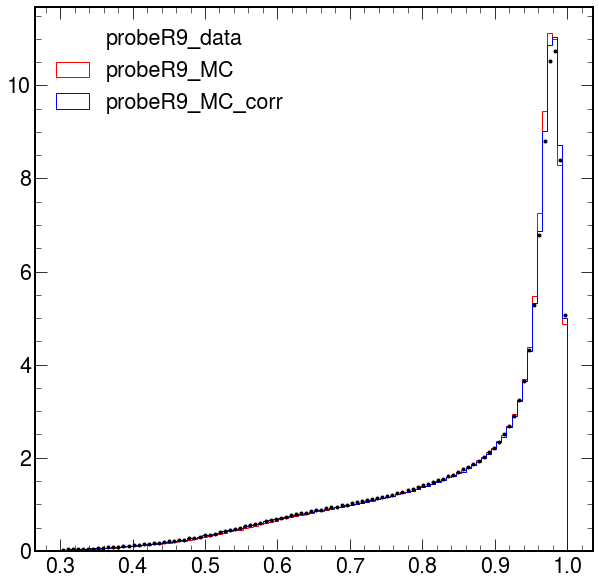

In [9]:
rg = [0.3, 1.]
bins = 100

plot_contributes(data_EB, df_EB, 'probeR9', bins, rg, 'upper left')

In [ ]:
rg = [0.25, 1.1]
bins = 100

plot_contributes(data_EE, df_EE, 'probeR9', bins, rg, 'upper left')

In [ ]:
rg = [0.25, 1.05]
bins = 100

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeR9', bins, rg, 'upper left')

# PhiWidth

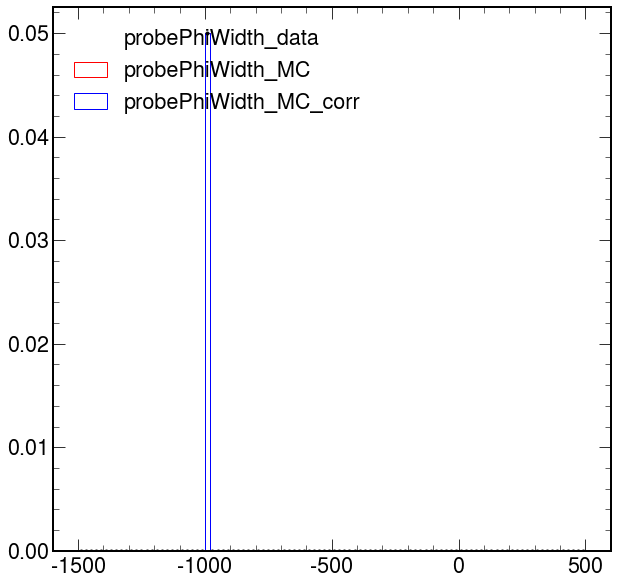

In [10]:
rg = [-1500, 500]
bins = 100

plot_contributes(data_EB, df_EB, 'probePhiWidth', bins, rg, 'upper left')

In [ ]:
rg = [-1500, 500]
bins = 100

plot_contributes(data_EE, df_EE, 'probePhiWidth', bins, rg, 'upper left')

In [ ]:
bins = 100

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probePhiWidth', bins, rg, 'upper left')

# SigmaIeIe

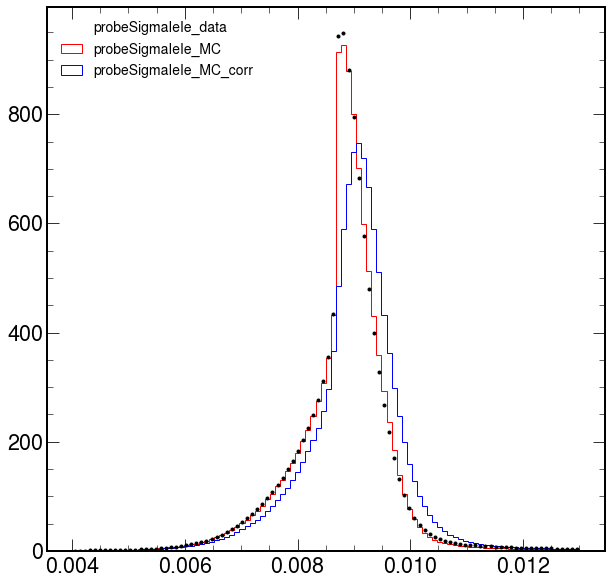

In [11]:
bins = 100
rg = [0.004, 0.013]

plot_contributes(data_EB, df_EB, 'probeSigmaIeIe', bins, rg, 'upper left', {'size': 14})

In [ ]:
bins = 100
rg = [0.015, 0.042]

plot_contributes(data_EE, df_EE, 'probeSigmaIeIe', bins, rg, 'upper right')

In [ ]:
bins = 100
rg = [0.004, 0.032]

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeSigmaIeIe', bins, rg, 'upper right')

# EtaWidth

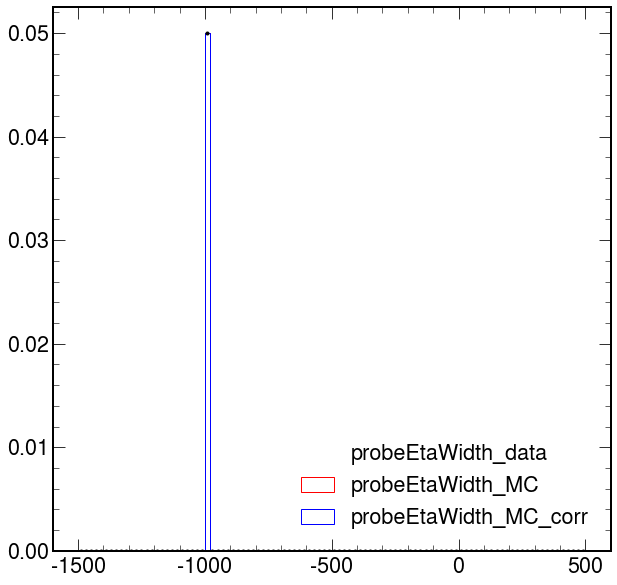

In [12]:
bins = 100
rg = [-1500, 500]

plot_contributes(data_EB, df_EB, 'probeEtaWidth', bins, rg, 'lower right')

In [ ]:
bins = 100
rg = [-1500, 500]

plot_contributes(data_EE, df_EE, 'probeEtaWidth', bins, rg, 'lower right')

In [ ]:
bins = 100
rg = [-1500, 500]

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeEtaWidth', bins, rg, 'upper right')

# ChIso03

In [ ]:
bins = 100
rg = [0., 2.0]

plot_contributes(data_EB, df_EB, 'probeChIso03', bins, rg, 'upper right', logy=True)

In [ ]:
bins = 100
rg = [0., 2.]

plot_contributes(data_EE, df_EE, 'probeChIso03', bins, rg, 'upper right', logy=True)

In [ ]:
bins = 100
rg = [0., 2.]

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeChIso03', bins, rg, 'upper right', logy=True)

# ChIso03worst

In [ ]:
bins = 200
rg = [0, 10]

plot_contributes(data_EB, df_EB, 'probeChIso03worst', bins, rg, 'upper right')

In [ ]:
bins = 200
rg = [0., 10]

plot_contributes(data_EE, df_EE, 'probeChIso03worst', bins, rg, 'upper right')

In [ ]:
bins = 200
rg = [0., 10]

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probeChIso03worst', bins, rg, 'upper right')

# PhoIso

In [ ]:
bins = 200
rg = [0, 4]

plot_contributes(data_EB, df_EB, 'probePhoIso', bins, rg, 'upper right', logy=True)

In [ ]:
bins = 200
rg = [0, 1.8]

plot_contributes(data_EE, df_EE, 'probePhoIso', bins, rg, 'upper right', logy=True)

In [ ]:
bins = 100
rg = [0, 3]

plot_both_contributes((data_EB, data_EE), (df_EB, df_EE), 'probePhoIso', bins, rg, 'upper right', logy=True)